In [1]:
import os
from shutil import rmtree

import xarray as xr

from src.test_problem import setup_solver
from src import nk_driver

from utils import plot_all_vars

%matplotlib inline

In [2]:
wdir = os.path.join(os.getenv("HOME"), "test_run_phosphorus_wdir")
if os.path.exists(wdir):
    if os.path.isfile(wdir):
        os.remove(wdir)
    else:
        rmtree(wdir)

In [3]:
# args common to all invocations to parse_args
args_base = ["--workdir", wdir, "--tracer_module_names", "phosphorus"]

In [4]:
setup_solver.main(setup_solver.parse_args(args_base + ["--fp_cnt", "1"]))

2021-03-29 19:25:24,817:72890:setup_solver.py:main:args.cfg_fnames="/Users/klindsay/codes/Newton-Krylov_OOC/input/test_problem/newton_krylov.cfg,/Users/klindsay/codes/Newton-Krylov_OOC/input/test_problem/model_params.cfg"
2021-03-29 19:25:24,821:72890:gen_invoker_script.py:gen_invoker_script:generating /Users/klindsay/test_run_phosphorus_wdir/nk_driver.sh
2021-03-29 19:25:24,824:72890:setup_solver.py:main:grid_weight_fname="/Users/klindsay/test_run_phosphorus_wdir/depth_axis.nc"
2021-03-29 19:25:24,845:72890:setup_solver.py:main:fp_iter=0
2021-03-29 19:25:54,683:72890:setup_solver.py:main:init_iterate_fname="/Users/klindsay/test_run_phosphorus_wdir/gen_init_iterate/init_iterate.nc"


<xarray.Dataset>
Dimensions:       (depth: 30, depth_edges: 31, nbnds: 2)
Coordinates:
  * depth         (depth) float64 5.0 15.01 25.07 35.32 ... 775.1 825.0 875.0
  * depth_edges   (depth_edges) float64 0.0 10.0 20.02 ... 800.0 850.0 900.0
Dimensions without coordinates: nbnds
Data variables:
    depth_bounds  (depth, nbnds) float64 ...
    depth_delta   (depth) float64 ...
    po4           (depth) float64 ...
    dop           (depth) float64 ...
    pop           (depth) float64 ...
    po4_s         (depth) float64 ...
    dop_s         (depth) float64 ...
    pop_s         (depth) float64 ...
Attributes:
    history:  2021-03-29 19:25:24: created by src.test_problem.model_state.Mo...


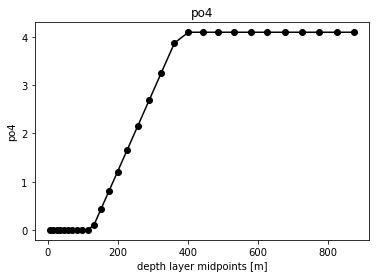

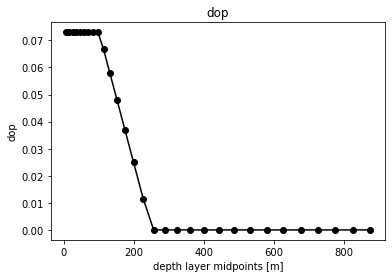

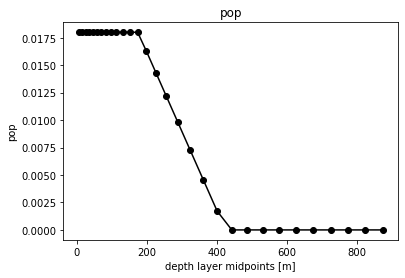

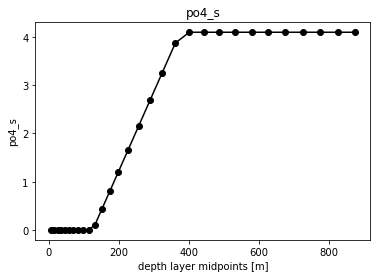

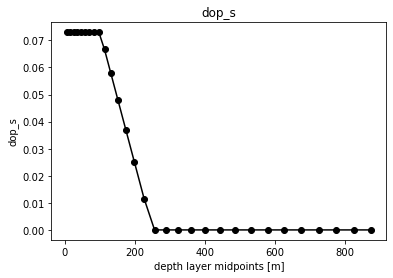

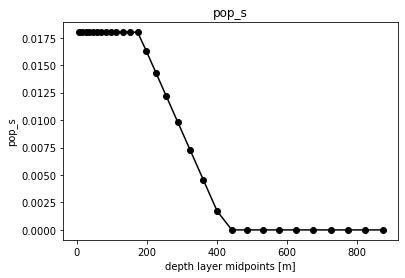

In [5]:
with xr.open_dataset(os.path.join(wdir, "gen_init_iterate", "init_iterate_00.nc")) as ds:
    print(ds)
    plot_all_vars(ds)

<xarray.Dataset>
Dimensions:                         (depth: 30, depth_edges: 31, nbnds: 2, time: 101)
Coordinates:
  * time                            (time) object 0001-01-01 00:00:00 ... 0002-01-01 00:00:00
  * depth                           (depth) float64 5.0 15.01 ... 825.0 875.0
  * depth_edges                     (depth_edges) float64 0.0 10.0 ... 900.0
Dimensions without coordinates: nbnds
Data variables:
    depth_bounds                    (depth, nbnds) float64 ...
    depth_delta                     (depth) float64 ...
    bldepth                         (time) float64 ...
    mixing_coeff                    (time, depth_edges) float64 ...
    po4                             (time, depth) float64 ...
    po4_time_mean                   (depth) float64 ...
    po4_time_anom                   (time, depth) float64 ...
    po4_time_std                    (depth) float64 ...
    po4_time_delta                  (depth) float64 ...
    po4_depth_int                   (time) floa

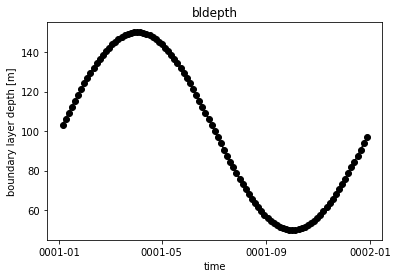

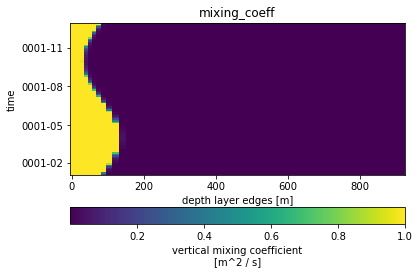

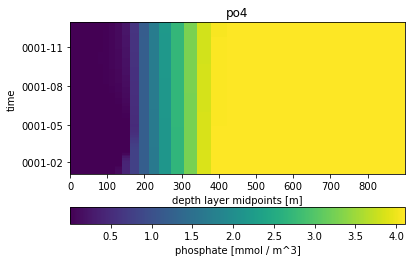

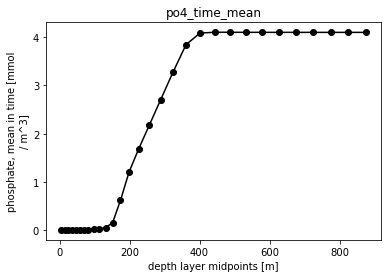

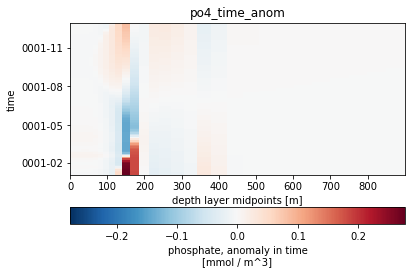

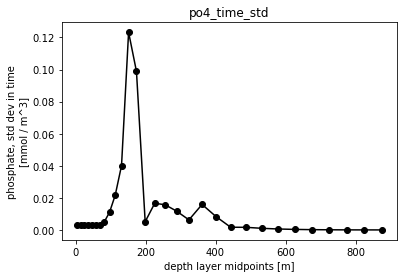

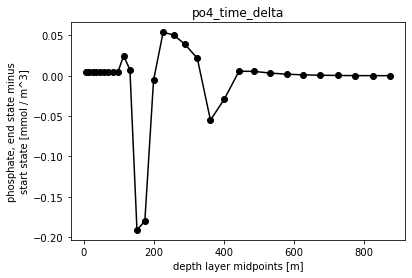

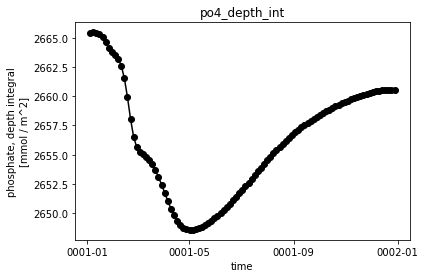

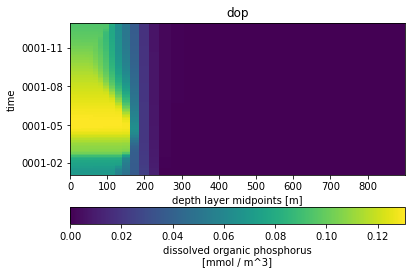

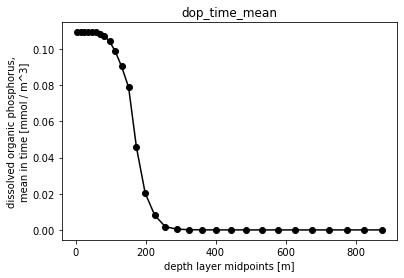

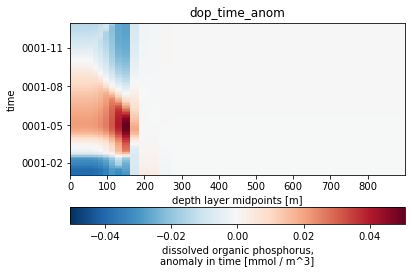

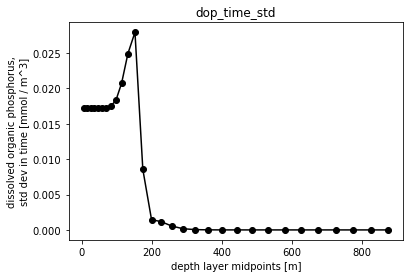

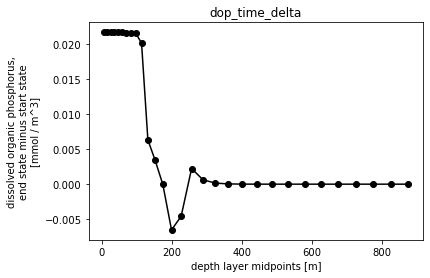

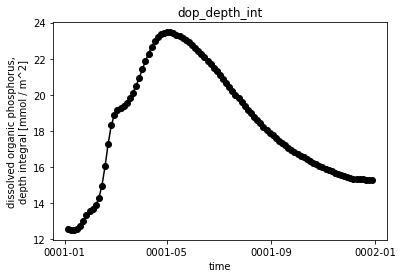

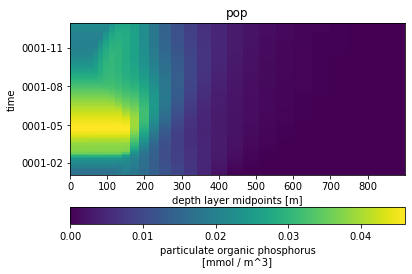

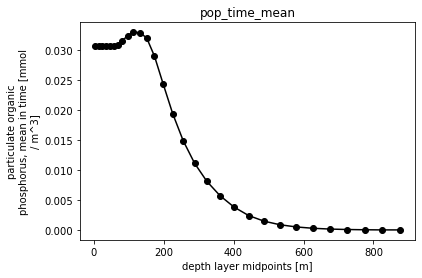

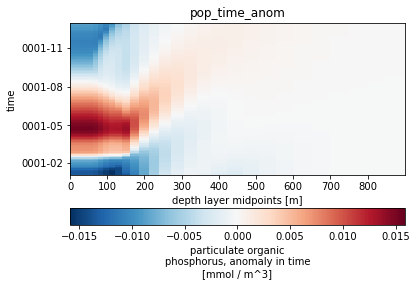

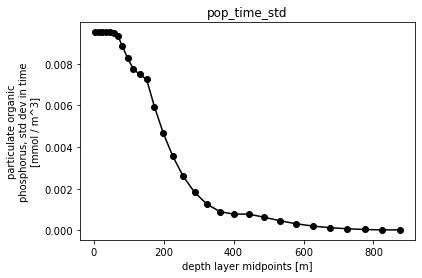

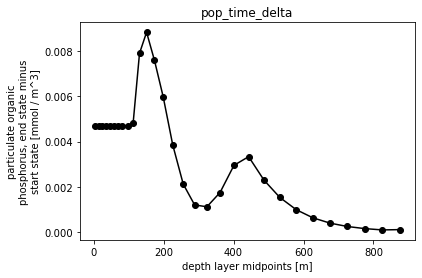

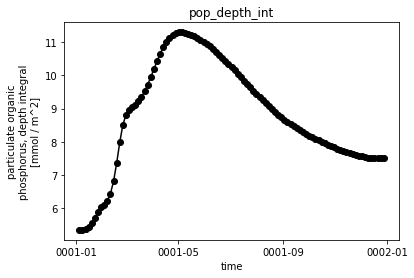

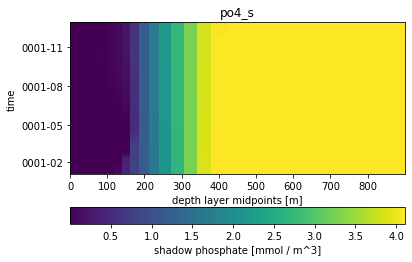

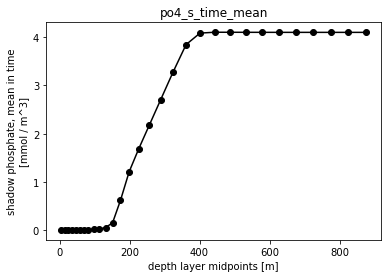

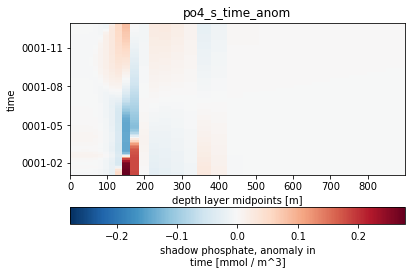

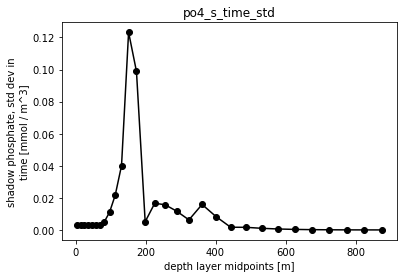

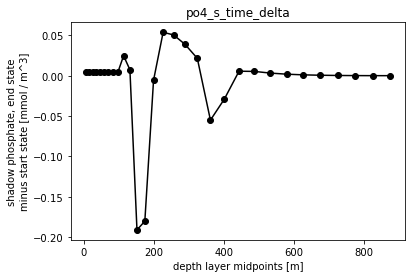

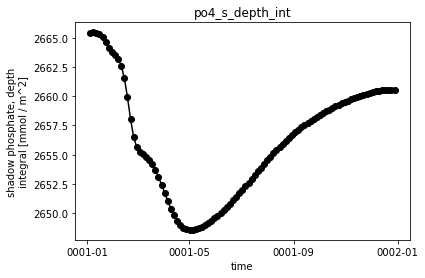

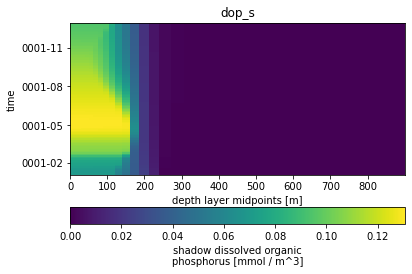

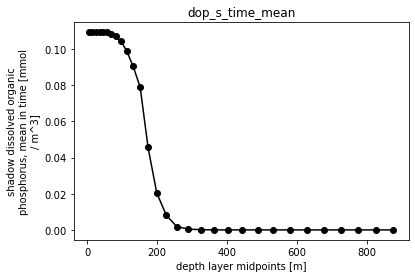

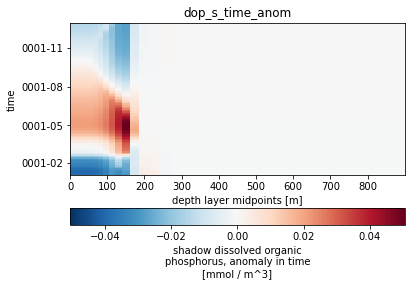

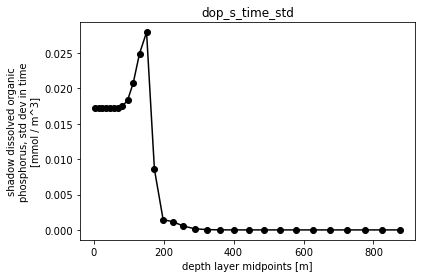

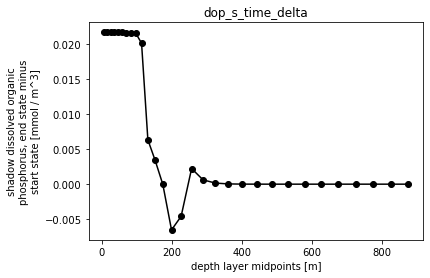

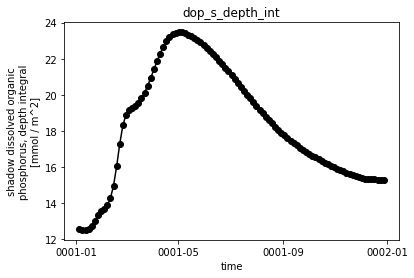

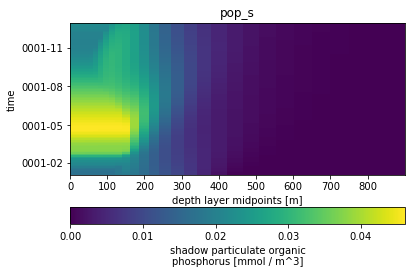

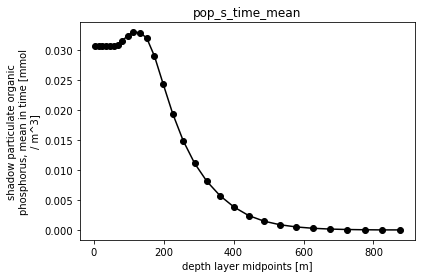

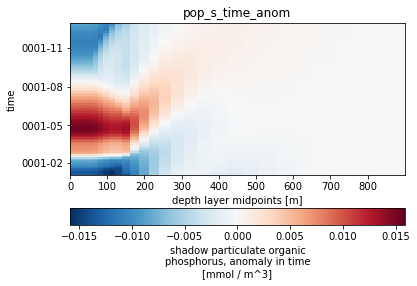

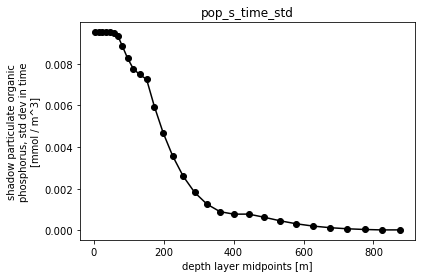

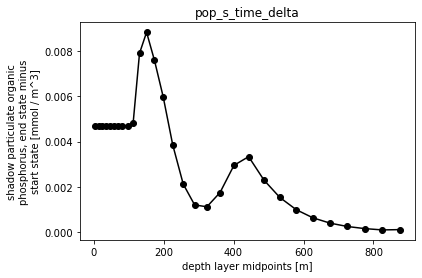

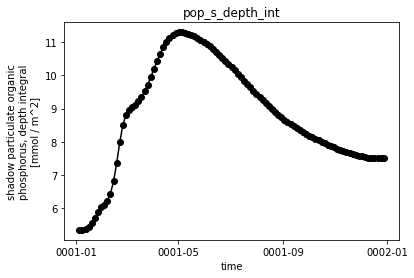

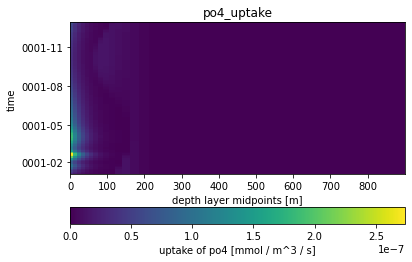

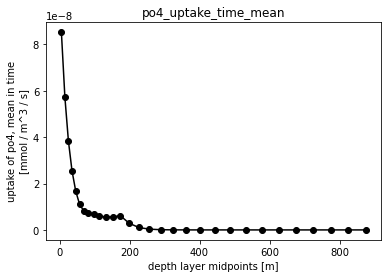

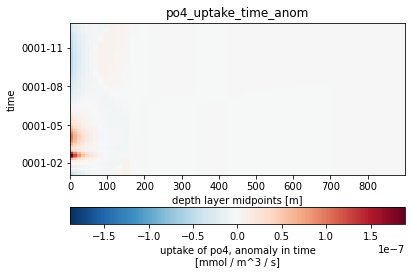

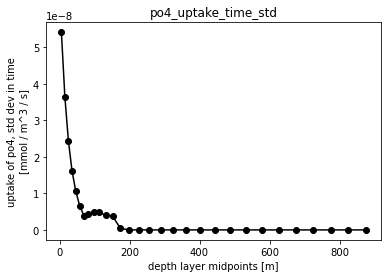

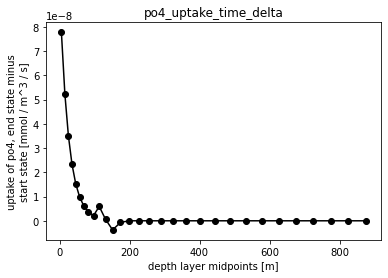

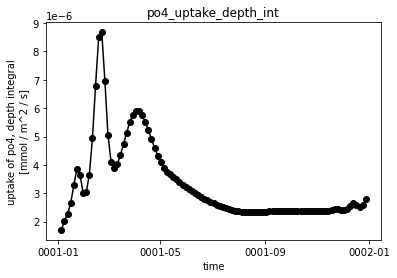

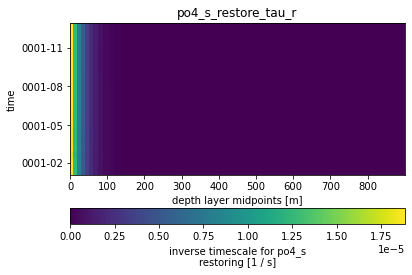

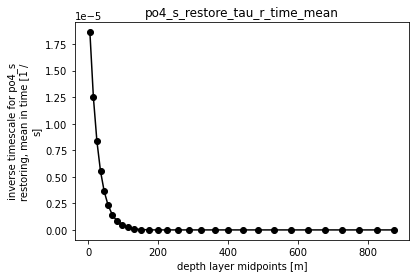

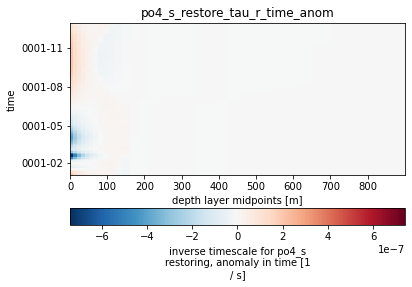

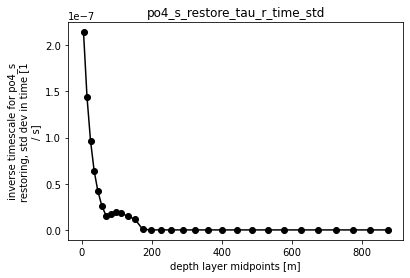

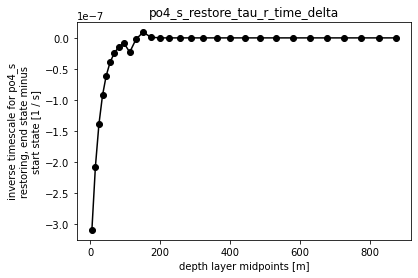

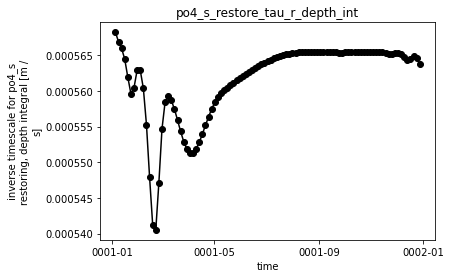

In [6]:
with xr.open_dataset(os.path.join(wdir, "gen_init_iterate", "hist_00.nc")) as ds:
    print(ds)
    plot_all_vars(ds)

<xarray.Dataset>
Dimensions:       (depth: 30, depth_edges: 31, nbnds: 2)
Coordinates:
  * depth         (depth) float64 5.0 15.01 25.07 35.32 ... 775.1 825.0 875.0
  * depth_edges   (depth_edges) float64 0.0 10.0 20.02 ... 800.0 850.0 900.0
Dimensions without coordinates: nbnds
Data variables:
    depth_bounds  (depth, nbnds) float64 ...
    depth_delta   (depth) float64 ...
    po4           (depth) float64 ...
    dop           (depth) float64 ...
    pop           (depth) float64 ...
    po4_s         (depth) float64 ...
    dop_s         (depth) float64 ...
    pop_s         (depth) float64 ...
Attributes:
    history:  2021-03-29 19:25:54: created by src.test_problem.model_state.Mo...


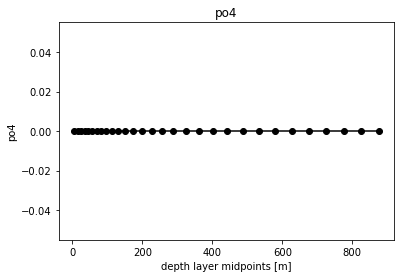

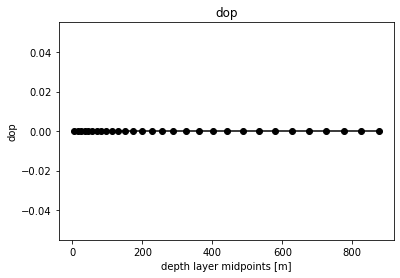

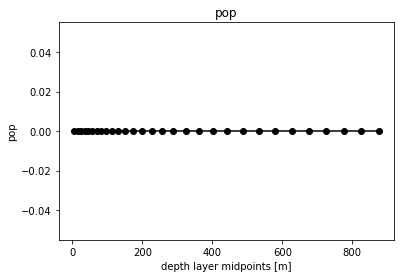

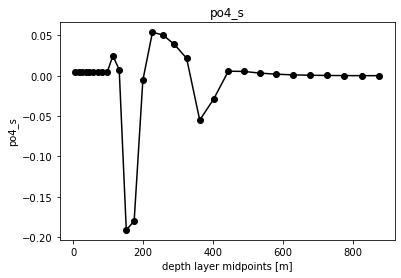

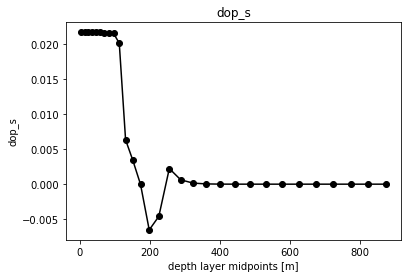

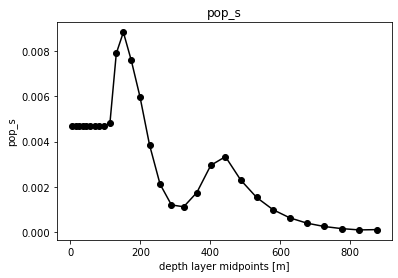

In [7]:
with xr.open_dataset(os.path.join(wdir, "gen_init_iterate", "fcn_00.nc")) as ds:
    print(ds)
    plot_all_vars(ds)

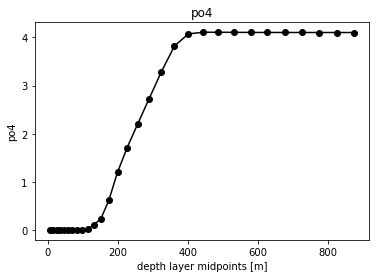

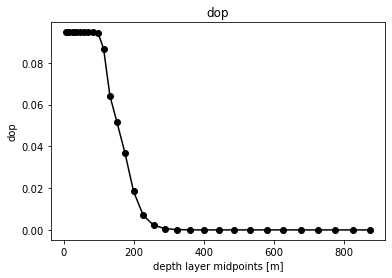

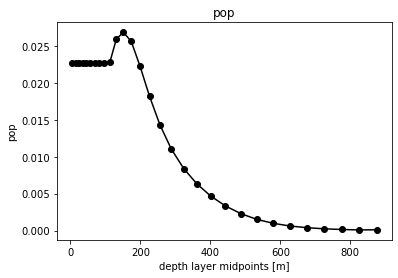

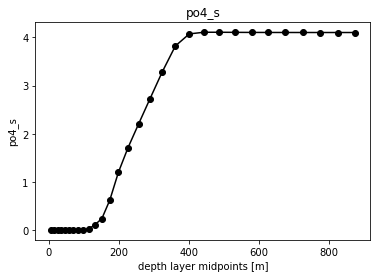

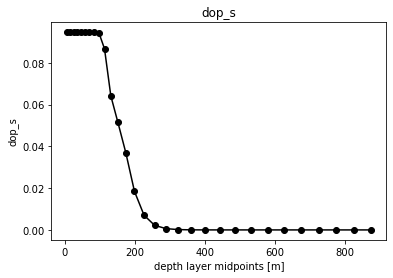

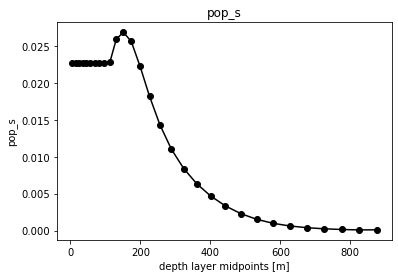

In [8]:
with xr.open_dataset(os.path.join(wdir, "gen_init_iterate", "init_iterate.nc")) as ds:
    plot_all_vars(ds)

In [9]:
try:
    nk_driver.main(nk_driver.parse_args(args_base + ["--persist"]))
except RuntimeError as err:
    print(str(err))
    print("number of maximum Newton iterations exceeded" not in str(err))
    if "number of maximum Newton iterations exceeded" not in str(err):
        raise

2021-03-29 19:26:09,424:72890:nk_driver.py:_get_model_state_class:using class ModelState from src.test_problem.model_state for model state
2021-03-29 19:26:09,425:72890:model_config.py:__init__:loading content from /Users/klindsay/codes/Newton-Krylov_OOC/input/test_problem/tracer_module_defs.yaml
2021-03-29 19:26:09,443:72890:model_config.py:check_shadow_tracers:tracer module phosphorus has po4_s as a shadow for po4
2021-03-29 19:26:09,445:72890:model_config.py:check_shadow_tracers:tracer module phosphorus has dop_s as a shadow for dop
2021-03-29 19:26:09,447:72890:model_config.py:check_shadow_tracers:tracer module phosphorus has pop_s as a shadow for pop
2021-03-29 19:26:09,449:72890:model_config.py:__init__:reading depth_delta from /Users/klindsay/test_run_phosphorus_wdir/depth_axis.nc for grid_weight
2021-03-29 19:26:09,451:72890:solver_state.py:__init__:"Newton" iteration now 0
2021-03-29 19:26:43,966:72890:tracer_module_state_base.py:log_vals:iteration=00,iterate,mean[phosphorus]=

<xarray.Dataset>
Dimensions:                      (depth: 30, depth_edges: 31, iteration: 4, nbnds: 2, region: 1)
Coordinates:
  * iteration                    (iteration) int32 0 1 2 3
  * region                       (region) int32 0
  * depth                        (depth) float64 5.0 15.01 25.07 ... 825.0 875.0
  * depth_edges                  (depth_edges) float64 0.0 10.0 ... 850.0 900.0
Dimensions without coordinates: nbnds
Data variables:
    iterate_mean_phosphorus      (iteration, region) float64 ...
    iterate_norm_phosphorus      (iteration, region) float64 ...
    fcn_mean_phosphorus          (iteration, region) float64 ...
    fcn_norm_phosphorus          (iteration, region) float64 ...
    increment_mean_phosphorus    (iteration, region) float64 ...
    increment_norm_phosphorus    (iteration, region) float64 ...
    increment_scalef_phosphorus  (iteration) float64 ...
    Armijo_factor_phosphorus     (iteration, region) float64 ...
    Krylov_iterations            (ite

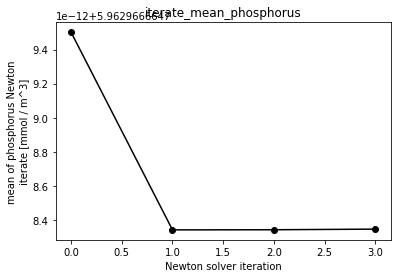

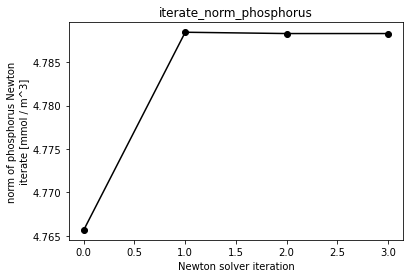

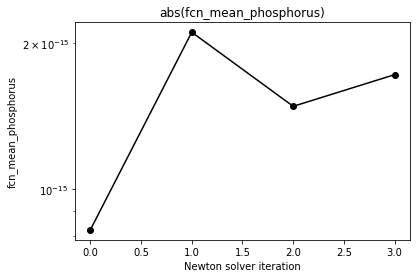

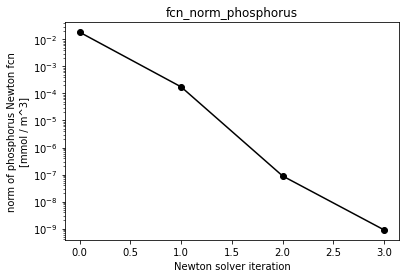

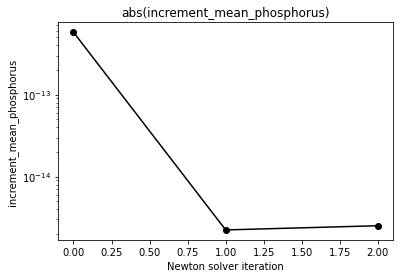

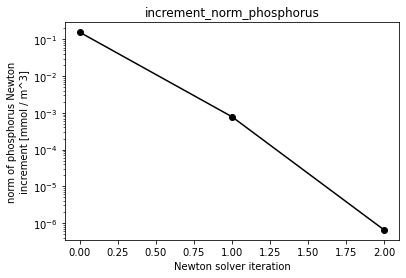

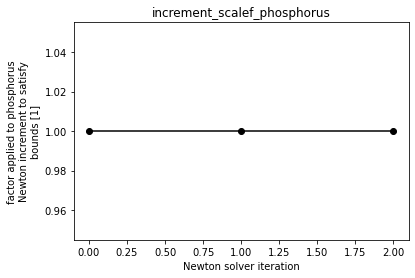

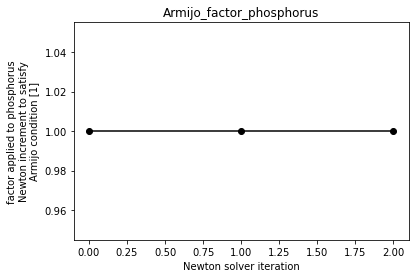

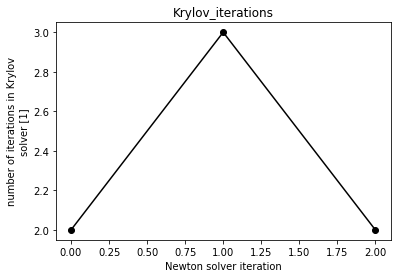

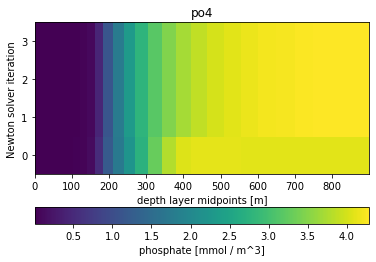

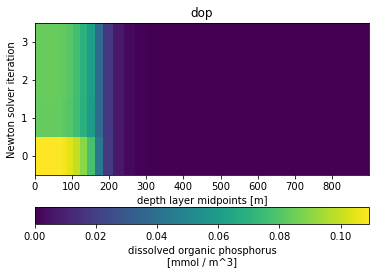

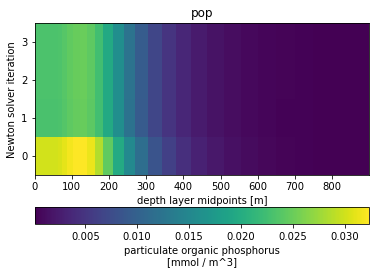

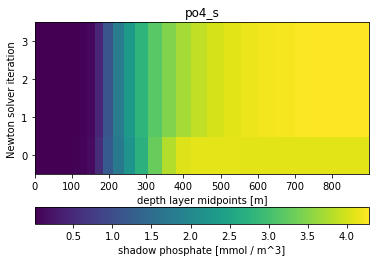

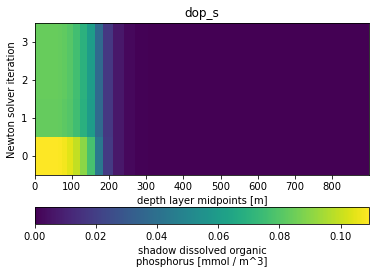

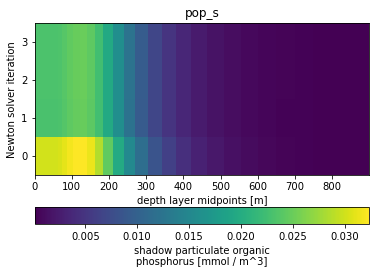

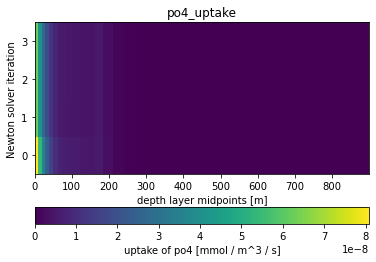

In [10]:
with xr.open_dataset(os.path.join(wdir, "Newton_stats.nc")) as ds:
    print(ds)
    plot_all_vars(ds)
    iterations = len(ds["iteration"])

In [11]:
iter_str_final = f"{iterations-1:02d}"
print(iter_str_final)

03


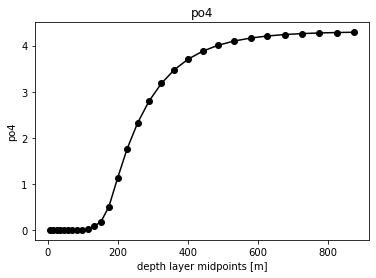

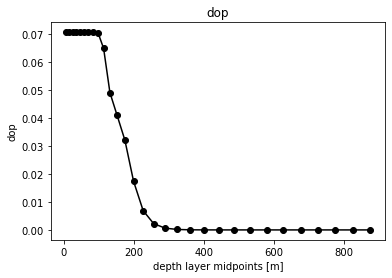

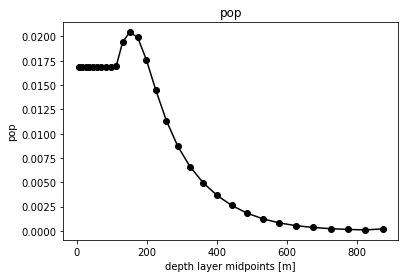

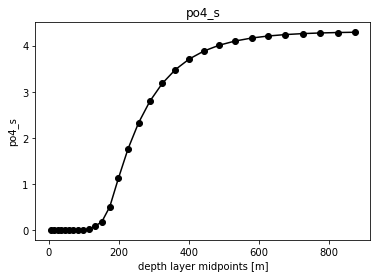

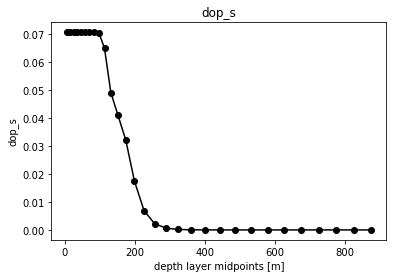

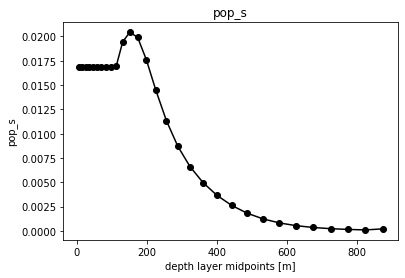

In [12]:
with xr.open_dataset(os.path.join(wdir, f"iterate_{iter_str_final}.nc")) as ds:
    plot_all_vars(ds)

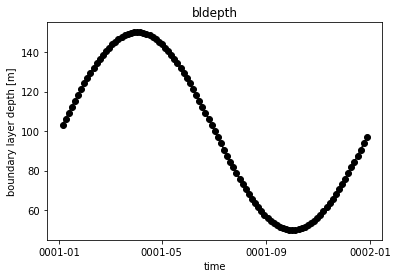

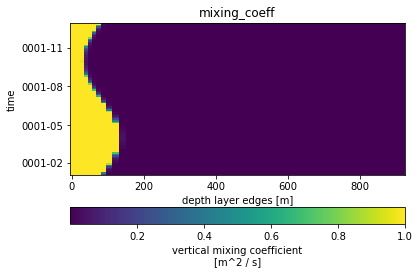

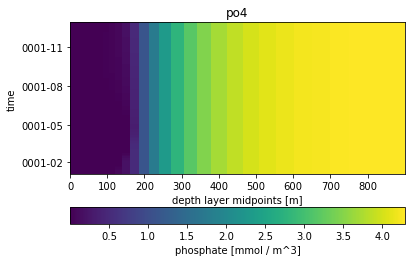

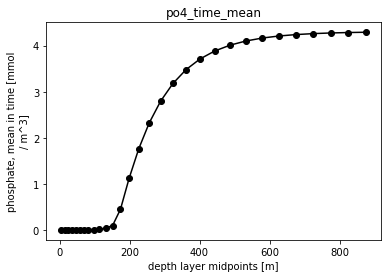

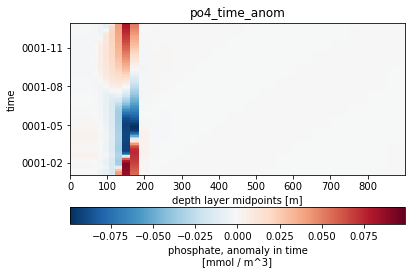

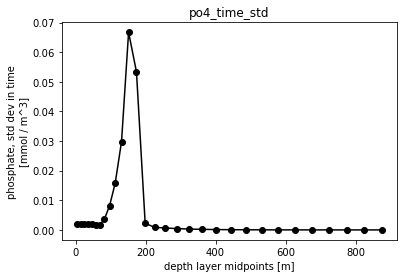

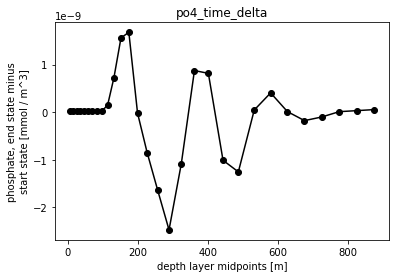

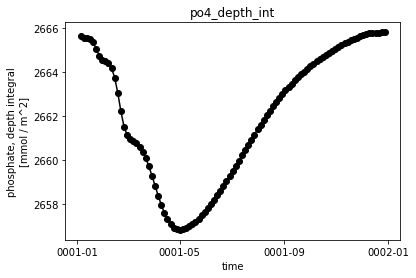

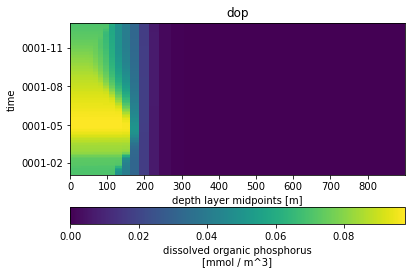

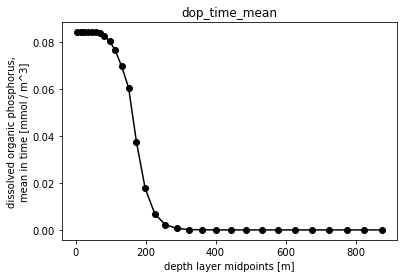

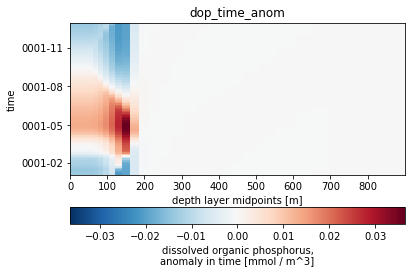

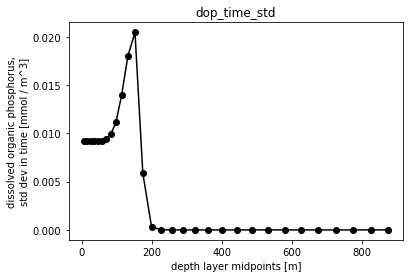

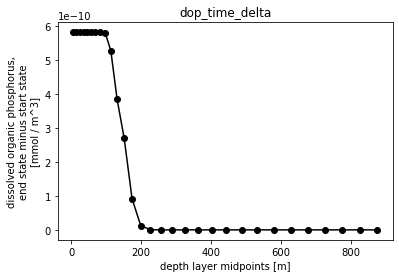

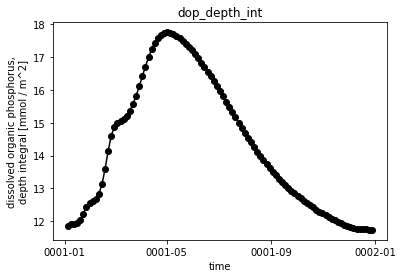

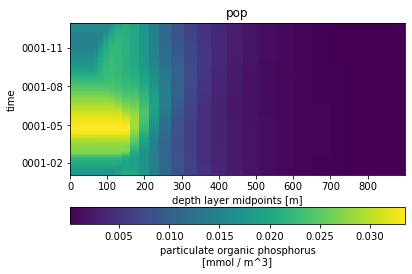

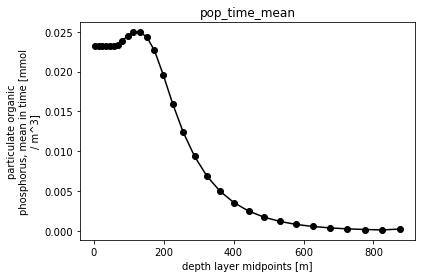

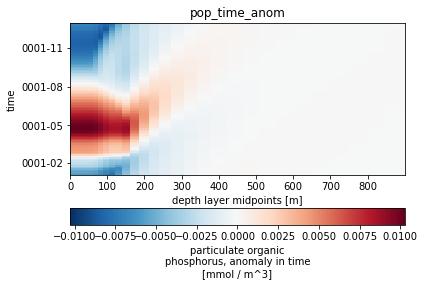

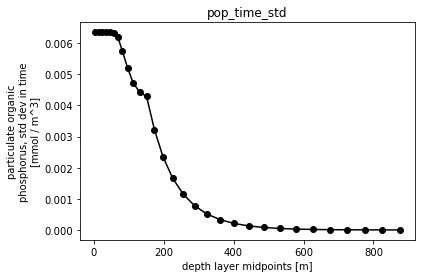

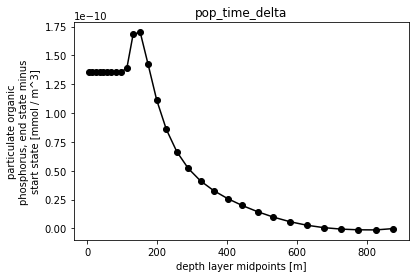

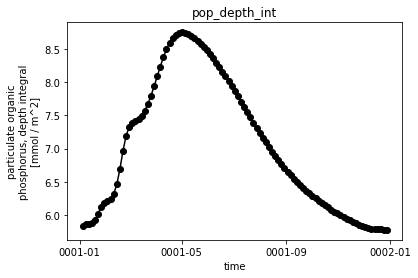

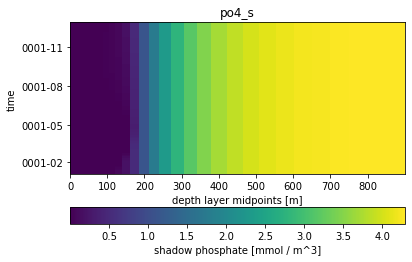

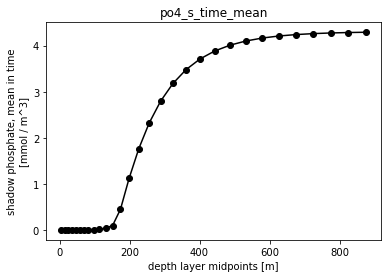

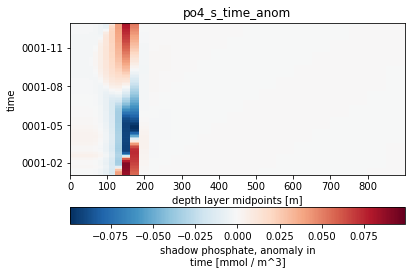

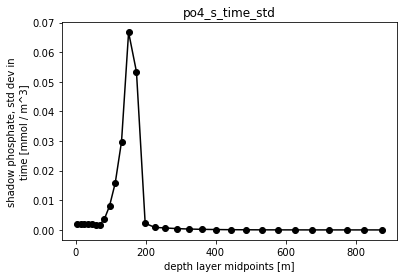

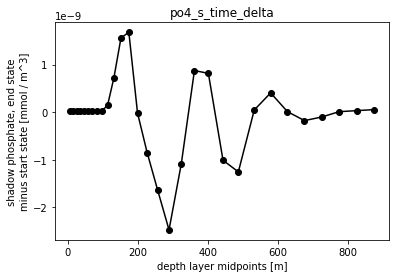

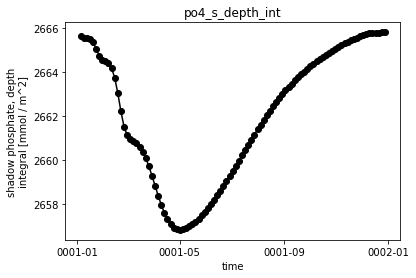

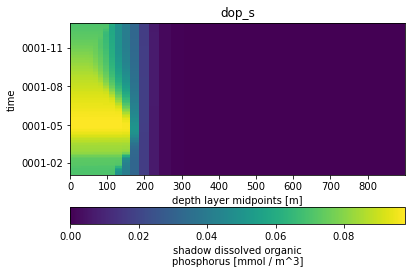

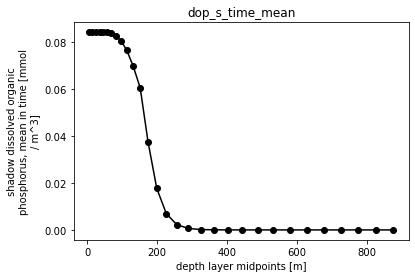

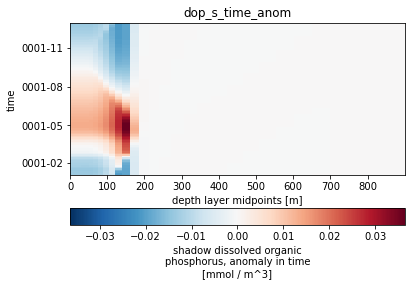

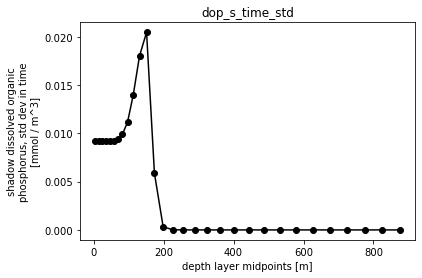

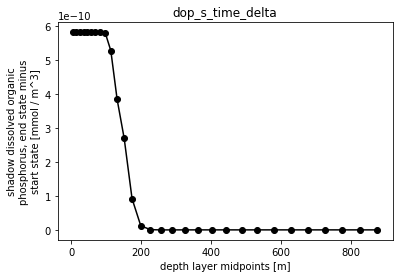

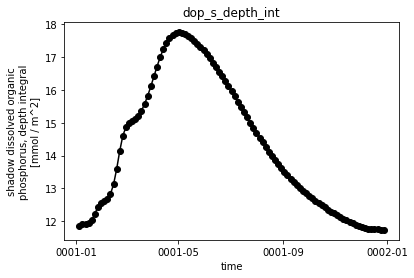

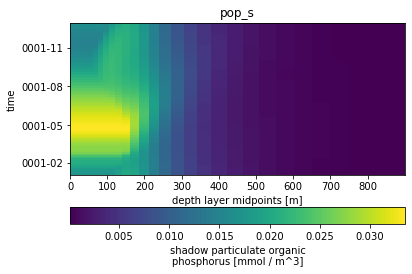

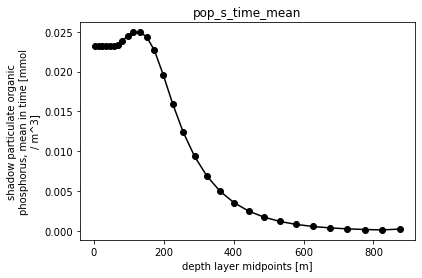

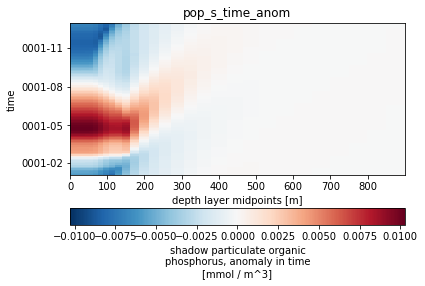

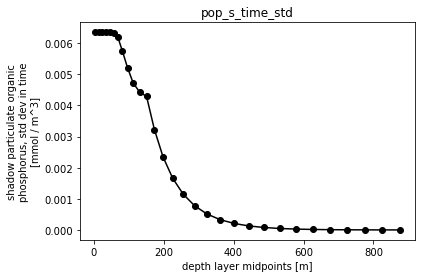

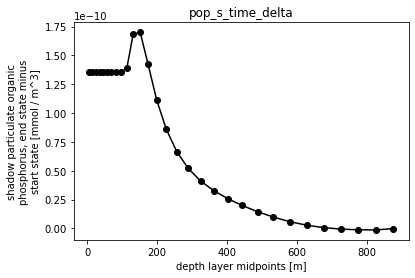

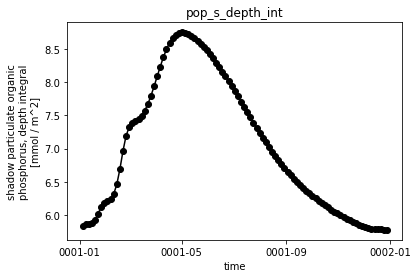

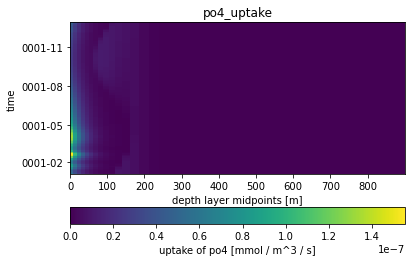

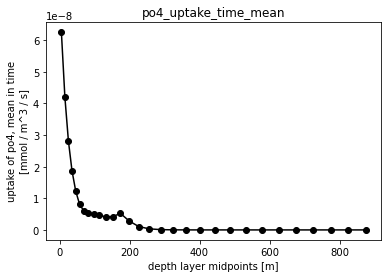

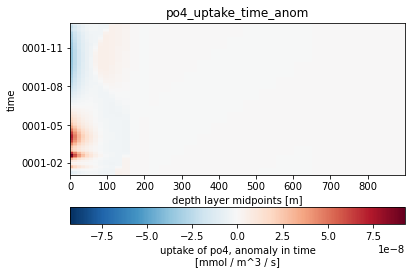

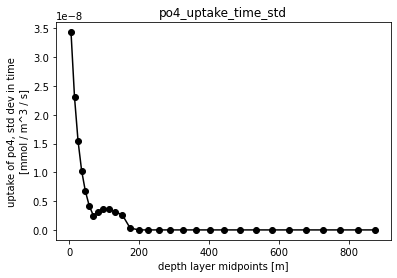

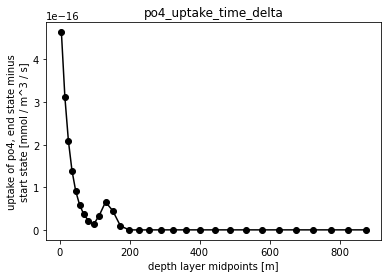

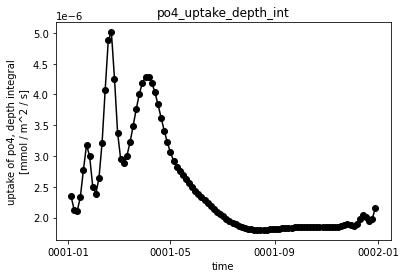

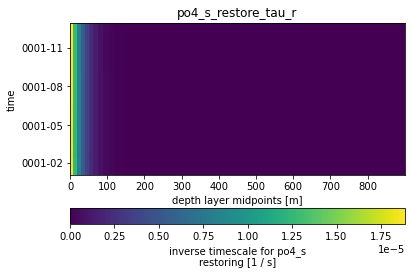

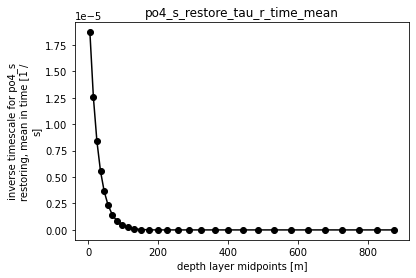

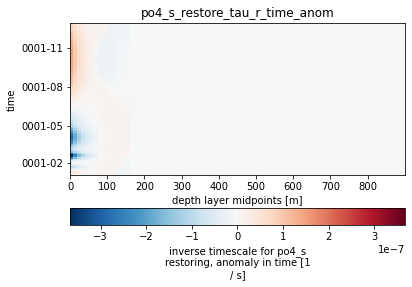

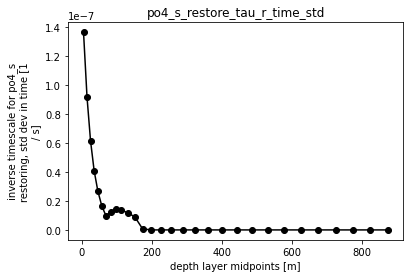

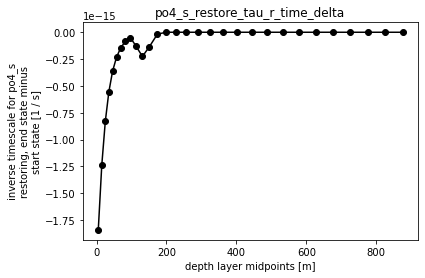

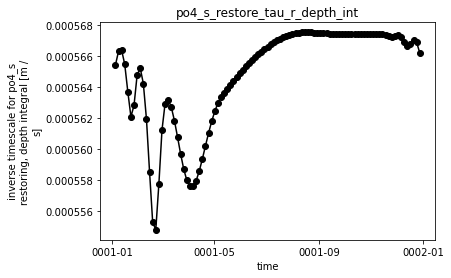

In [13]:
with xr.open_dataset(os.path.join(wdir, f"hist_{iter_str_final}.nc")) as ds:
    plot_all_vars(ds)

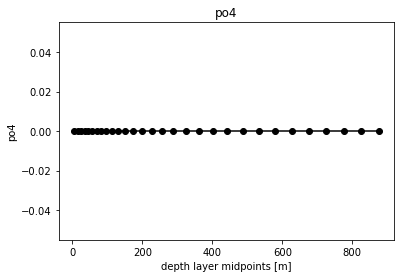

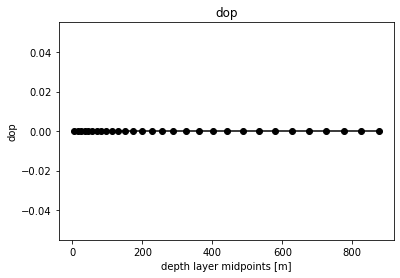

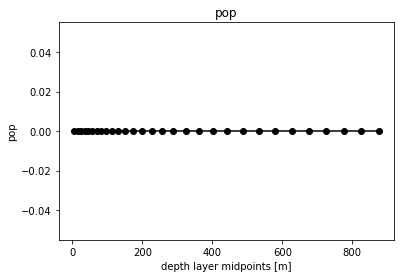

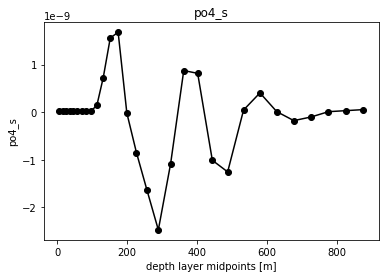

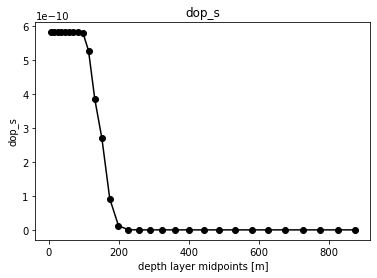

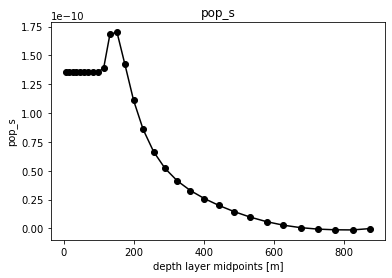

In [14]:
with xr.open_dataset(os.path.join(wdir, f"fcn_{iter_str_final}.nc")) as ds:
    plot_all_vars(ds)